**Neural network example to perform sentiment analysis**

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [ ]:
print(len(train_data[0]))

218


In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Preparing the data**
*Encoding the integer sequences via multi-hot
encoding*

In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1.
  return results



In [ ]:
x_train=vectorize_sequences(train_data)

In [ ]:
print(len(x_train[0]))

10000


In [ ]:
print(len(x_train))

25000


In [ ]:
x_test=vectorize_sequences(test_data)

vectorize labels

In [ ]:
y_train=np.asanyarray(train_labels).astype('float32')
y_test=np.asanyarray(test_labels).astype('float32')

**Building the model** 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
model=keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"]
)

**Setting aside a validation set**

In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
118/118 [==============================] - 3s 15ms/step - loss: 0.1342 - accuracy: 0.8347 - val_loss: 0.0988 - val_accuracy: 0.8724
Epoch 2/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0677 - accuracy: 0.9171 - val_loss: 0.1002 - val_accuracy: 0.8632
Epoch 3/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0497 - accuracy: 0.9405 - val_loss: 0.0855 - val_accuracy: 0.8843
Epoch 4/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0379 - accuracy: 0.9561 - val_loss: 0.1085 - val_accuracy: 0.8563
Epoch 5/20
118/118 [==============================] - 1s 10ms/step - loss: 0.0305 - accuracy: 0.9653 - val_loss: 0.0980 - val_accuracy: 0.8738
Epoch 6/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0243 - accuracy: 0.9740 - val_loss: 0.0953 - val_accuracy: 0.8763
Epoch 7/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0193 - accuracy: 0.9801 - val_loss: 0.0968 - val_accuracy: 0.8787
Epo

**Plotting the training and validation loss**

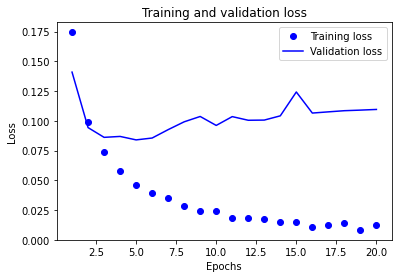

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

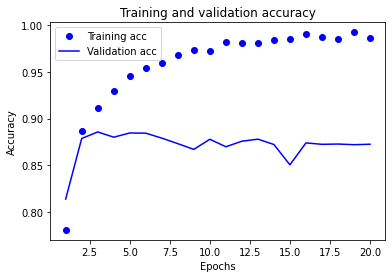

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.1649 - accuracy: 0.8125


In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.00832319],
       [1.        ],
       [0.960664  ],
       ...,
       [0.00109284],
       [0.00489736],
       [0.84248316]], dtype=float32)